<a href="https://colab.research.google.com/github/MissFengPhyllis/homeworkAndProject/blob/master/Final_Homework_Fruits20200514_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework assignment - Fruits

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of fruit images. The dataset contains segmented images of 60 different fruits. You'll have to implement a convolutional network.

## Rules and Comments
- This is an ML class so to pass the homework you do have to implement a working classifier, just loading the data is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course)
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID in the box below for easier identification.

**Name: Feng Lijiao**  
**Neptun ID: H2MI9D** 

In [0]:
# Keras 2.3.1 has a bug in evalutation, downgrade it
%tensorflow_version 1.x
!pip install -U keras==2.2.5

TensorFlow 1.x selected.
     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import pickle


## Dataset preparations
First download the data and extract it:

In [0]:
!wget http://vegesm.web.elte.hu/fruits_small.zip
!unzip fruits_small.zip > /dev/null

--2020-05-14 09:35:25--  http://vegesm.web.elte.hu/fruits_small.zip
Resolving vegesm.web.elte.hu (vegesm.web.elte.hu)... 157.181.1.225
Connecting to vegesm.web.elte.hu (vegesm.web.elte.hu)|157.181.1.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186322919 (178M) [application/zip]
Saving to: ‘fruits_small.zip’

fruits_small.zip    100%[===================>] 177.69M   467KB/s    in 4m 18s  

2020-05-14 09:40:21 (706 KB/s) - ‘fruits_small.zip’ saved [186322919/186322919]



In [0]:
# tf.placeholder error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph() 

This will download and extract the dataset into `/content/fruits-small`. You can inspect the files in the sidebar on the left, under the *Files* tab. The dataset contains 100x100 pixel images of fruits, grouped by classes into folders. 

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set.



Now that you have set up the dataset, it's time to look at some of 

*   List item
*   List item

the images. Create a function that randomly selects 4 images and prints them with the class names.

In [0]:
# show images 
import skimage
from skimage import color,data,transform,io
from sklearn.utils import shuffle
import keras
from keras.utils import np_utils

In [0]:
data_dir = "/content/fruits-small/" 
train_dir = data_dir + "train/"
validation_dir = data_dir + "test/"

In [0]:

##Get the picture data under the corresponding path folder
def load_data(dir_path):
    no5_imgs=[] ##Create an empty list to store the fifth picture under each folder
    labels_no5=[] ##Create an empty list to store the folder name corresponding to the fifth picture
    lab=os.listdir(dir_path)
    n=0
    for l in lab:
      img=os.listdir(dir_path+l) ##img is the folder under the corresponding path
      n+=1
      no5_img=format_path(img) ##Arrange the pictures in the correct order to facilitate the fifth picture
      img5_path=dir_path+l+'/'+no5_img
      labels_no5.append(l)
      no5_imgs.append(skimage.io.imread(img5_path)) ##The fifth picture of each category is read out and stored in the data set no5_imgs
    return no5_imgs,labels_no5 ##The storage order of the images in the returned images is different from the storage order in the actual folder

In [0]:
##Function for sequentially reading files in a folder
def format_path(img):  ## img is the result of os.listdir (label folder)   
    yes_int=[] ##The new list is used to store the file name of the first item that can be converted into an integer
    for s in range(len(img)): ##Iterate
        img[s] = img[s].split('_') ##Separate file names with "_" as a separator
        if(is_number(img[s][0])): ##Determine whether the first part of the file name can be converted to an integer
            img[s][0]=int(img[s][0]) ##Convert the first part of the file name to an integer
            yes_int.append(img[s]) ##Put the file name in the list without r
    yes_int.sort() ##Sort the list of file names that can be converted to integer
    for yi in range(len(yes_int)): ##variable
        yes_int[yi][0]=str(yes_int[yi][0]) ##Convert the previous part to integer and then back to the string
        yes_int[yi]=yes_int[yi][0]+'_'+yes_int[yi][1] ##Perform stitching
    no5_img=yes_int[4]
    return no5_img

In [0]:
##Determine whether a piece of data can be converted to plastic
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [0]:
##Final train data set and label
no5_imgs,labels_no5 = load_data(train_dir)
print(len(labels_no5),len(no5_imgs))

60 60


In [0]:
##Call display function
import random
def display_no5_img_4(dict_no5):
  fig = plt.figure(figsize=(15,15)) ##The displayed size is 15*15
  for i in range(len(dict_no5)):
    # print(i) //Subscript of dictionary list
    # print(dict_list_no5[i][0])//Picture title
    # print(dict_list_no5[i][1])//Picture matrix
    plt.subplot(11,7,(i+1))
    label = dict_no5[i][0]
    img = dict_no5[i][1]
    plt.title("{0}".format(label))
    plt.imshow(img)
  plt.show()

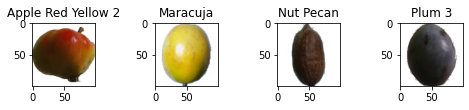

In [0]:
dict_no5 = zip(labels_no5,no5_imgs)
dict_list_no5 = list(dict_no5) 
random_list = random.sample(dict_list_no5,4)
display_no5_img_4(random_list)

in this code, you can run several times, each turn you can get a random 4 pictures 

### Splitting the dataset

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. 

In [0]:
## notation definition
import os
IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3
NETWORK_DEPTH = 4
data_dir = "/content/fruits-small/" 
train_dir = data_dir + "train/"
validation_dir = data_dir + "test/"

batch_size = 60
input_size = IMAGE_HEIGHT * IMAGE_WIDTH * NETWORK_DEPTH
num_classes = len(os.listdir(train_dir))
# probability to keep the values after a training iteration
dropout = 0.8

initial_learning_rate = 0.001
final_learning_rate = 0.00001
learning_rate = initial_learning_rate

# number of iterations to run the training
# iterations = 75000
iterations = 1500
# number of iterations after we display the loss and accuracy
acc_display_interval = 1000
# default number of iterations after we save the model
save_interval = 1000
step_display_interval = 100
# use the saved model and continue training
useCkpt = False
# placeholder for probability to keep the network parameters after an iteration
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

### Preprocess the dataset

We need to augment the data, since we do not have many images per classes. Create an augmentation mechanism, data automatically does the following transformations during training:
- flip images horizontally
- rotates them
- performs zooming

In [0]:
# -------------------- Write/Read TF record logic --------------------
class ImageCoder(object):
    """Helper class that provides TensorFlow image coding utilities."""

    def __init__(self):
        # Create a single Session to run all image coding calls.
        self._sess = tf.Session()

        # Initializes function that decodes RGB JPEG data.
        self._decode_jpeg_data = tf.placeholder(dtype=tf.string)
        self._decode_jpeg = tf.image.decode_jpeg(self._decode_jpeg_data, channels=3)

    def decode_jpeg(self, image_data):
        image = self._sess.run(self._decode_jpeg,
                               feed_dict={self._decode_jpeg_data: image_data})
        assert len(image.shape) == 3    #  检查条件，不符合就终止程序
        assert image.shape[2] == 3
        return image
        


In [0]:
def write_image_data(dir_name, tfrecords_name):
    writer = tf.python_io.TFRecordWriter(tfrecords_name)
    coder = ImageCoder()
    image_count = 0
    index = -1
    classes_dict = {}

    for folder_name in os.listdir(dir_name):
        class_path = dir_name + '/' + folder_name + '/'
        index += 1
        classes_dict[index] = folder_name
        for image_name in os.listdir(class_path):
            image_path = class_path + image_name
            image_count += 1
            with tf.gfile.FastGFile(image_path, 'rb') as f:
                image_data = f.read()
                example = tf.train.Example(
                    features = tf.train.Features(
                        feature = {
                            'label':tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                            'image_raw':tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.compat.as_bytes(image_data)]))
                        }
                    )
                )
                writer.write(example.SerializeToString())
    writer.close()
    print(classes_dict)
    return image_count, classes_dict


In [0]:
def parse_single_example(serialized_example):
    features = tf.parse_single_example(
        serialized_example,
        features={
            'image_raw': tf.FixedLenFeature([], tf.string),
            'label': tf.FixedLenFeature([], tf.int64)
        }
    )
    image = tf.image.decode_jpeg(features['image_raw'], channels=3)
    image = tf.reshape(image, [100, 100, 3])
    label = tf.cast(features['label'], tf.int32)
    return image, label


In [0]:
def conv(input_tensor,
         name,
         kernel_width,
         kernel_height,
         num_out_activation_maps,
         stride_horizontal=1,
         stride_vertical=1,
         activation_fn=tf.nn.relu):
    prev_layer_output = input_tensor.get_shape()[-1].value
    with tf.variable_scope(name):
        weights = tf.get_variable(
            'weights', [
                kernel_height, kernel_width, prev_layer_output,
                num_out_activation_maps
            ], tf.float32,
            tf.truncated_normal_initializer(stddev=5e-2, dtype=tf.float32))
        biases = tf.get_variable("bias", [num_out_activation_maps], tf.float32,
                                 tf.constant_initializer(0.0))
        conv_layer = tf.nn.conv2d(
            input_tensor,
            weights, (1, stride_horizontal, stride_vertical, 1),
            padding='SAME')
        activation = activation_fn(tf.nn.bias_add(conv_layer, biases))
        return activation


In [0]:
def fully_connected(input_tensor,
                    name,
                    output_neurons,
                    activation_fn=tf.nn.relu):
    n_in = input_tensor.get_shape()[-1].value
    with tf.variable_scope(name):
        weights = tf.get_variable(
            'weights', [n_in, output_neurons],
            tf.float32,
            initializer=tf.truncated_normal_initializer(
                stddev=5e-2, dtype=tf.float32))
        biases = tf.get_variable("bias", [output_neurons], tf.float32,
                                 tf.constant_initializer(0.0))
        logits = tf.nn.bias_add(tf.matmul(input_tensor, weights), biases)
        if activation_fn is None:
            return logits
        return activation_fn(logits)


In [0]:
def max_pool(input_tensor, name, kernel_height, kernel_width,
             stride_horizontal, stride_vertical):
    return tf.nn.max_pool(
        input_tensor,
        ksize=[1, kernel_height, kernel_width, 1],
        strides=[1, stride_horizontal, stride_vertical, 1],
        padding='VALID',
        name=name)


In [0]:
def loss(logits, onehot_labels):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=onehot_labels, name='xentropy')
    loss = tf.reduce_mean(xentropy, name='loss')
    return loss


In [0]:
def update_learning_rate(acc, learn_rate):
    return learn_rate - acc * learn_rate * 0.9


## Training the network

Implement and train the following architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 32 filters
- A 2x2 MaxPooling layer
- Two convolutional layers with 3x3 kernels and 64 filters each
- A MaxPooling layer
- Another 3x3 convolutional layer with 128 filters, followed by a MaxPooling layer
- A fully connected layer of 512 units
- A final softmax layer

All layers have ReLU activations. Train the network for 15 epochs.

In [0]:

def conv_net(input_layer, dropout):
    # number of activation maps for each convolutional layer
    number_of_act_maps_conv1 = 32
    number_of_act_maps_conv2 = 64
    number_of_act_maps_conv3 = 64
    number_of_act_maps_conv4 = 128

    # number of outputs for each fully connected layer
    number_of_fcl_outputs1 = 512
    number_of_fcl_outputs2 = 256

    input_layer = tf.reshape(input_layer, shape=[-1, IMAGE_HEIGHT, IMAGE_WIDTH, NETWORK_DEPTH])

    # A convolutional layer with 5x5 kernel and 32 filters
    # A 2x2 MaxPooling layer
    conv1 = conv(input_layer, 'conv1', kernel_width=5, kernel_height=5, num_out_activation_maps=number_of_act_maps_conv1)
    conv1 = max_pool(conv1, 'max_pool1', kernel_height=2, kernel_width=2, stride_horizontal=2, stride_vertical=2)

    # Two convolutional layers with 3x3 kernels and 64 filters each
    # A MaxPooling layer
    conv2 = conv(conv1, 'conv2', kernel_width=3, kernel_height=3, num_out_activation_maps=number_of_act_maps_conv2)
    conv2 = max_pool(conv2, 'max_pool2', kernel_height=2, kernel_width=2, stride_horizontal=2, stride_vertical=2)

   
    conv3 = conv(conv2, 'conv3', kernel_width=3, kernel_height=3, num_out_activation_maps=number_of_act_maps_conv3)
    conv3 = max_pool(conv3, 'max_pool3', kernel_height=2, kernel_width=2, stride_horizontal=2, stride_vertical=2)

    # Another 3x3 convolutional layer with 128 filters, followed by a MaxPooling layer
    conv4 = conv(conv3, 'conv4', kernel_width=1, kernel_height=1, num_out_activation_maps=number_of_act_maps_conv4)
    conv4 = max_pool(conv4, 'max_pool4', kernel_height=2, kernel_width=2, stride_horizontal=2, stride_vertical=2)

    flattened_shape = np.prod([s.value for s in conv4.get_shape()[1:]])
    net = tf.reshape(conv4, [-1, flattened_shape], name="flatten")

 

    fcl1 = fully_connected(net, 'fcl1', number_of_fcl_outputs1)
    fcl1 = tf.nn.dropout(fcl1, rate=1 - dropout)

    fcl2 = fully_connected(fcl1, 'fcl2', number_of_fcl_outputs2)
    fcl2 = tf.nn.dropout(fcl2, rate=1 - dropout)

    # out = fully_connected(fcl2, 'out', num_classes, activation_fn=None)

    #A fully connected layer of 512 units
    out = fully_connected(net, 'out', 512, activation_fn=None)

    return out
    


In [0]:

# perform data augmentation on images
# add random hue and saturation
# randomly flip the image vertically and horizontally
def augment_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.random_hue(image, 0.02)
    image = tf.image.random_saturation(image, 0.9, 1.2)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return build_hsv_grayscale_image(image)
    


In [0]:

# converts the image from RGB to HSV and
# adds a 4th channel to the HSV ones that contains the image in gray scale
# for test just convert the image to HSV and add the gray scale channel
def build_hsv_grayscale_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32)
    gray_image = tf.image.rgb_to_grayscale(image)
    image = tf.image.rgb_to_hsv(image)
    rez = tf.concat([image, gray_image], 2)
    return rez
    


In [0]:

def build_datasets(train_file, test_file, batch_size):
    train_dataset = tf.data.TFRecordDataset(train_file).repeat()
    train_dataset = train_dataset.map(parse_single_example).map(
        lambda image, label: (augment_image(image), label))
    train_dataset = train_dataset.shuffle(
        buffer_size=10000, reshuffle_each_iteration=True)
    train_dataset = train_dataset.batch(batch_size)

    validation_dataset = tf.data.TFRecordDataset(train_file)
    validation_dataset = validation_dataset.map(parse_single_example).map(
        lambda image, label: (build_hsv_grayscale_image(image), label))
    validation_dataset = validation_dataset.batch(batch_size)
    
    test_dataset = tf.data.TFRecordDataset(test_file)
    test_dataset = test_dataset.map(parse_single_example).map(
        lambda image, label: (build_hsv_grayscale_image(image), label))
    test_dataset = test_dataset.batch(batch_size)
    return train_dataset, validation_dataset, test_dataset
    


In [0]:

import time
def train_model(session, train_operation, loss_operation, correct_prediction,
                iterator_map):
    global learning_rate
    time1 = time.time()
    train_iterator = iterator_map["train_iterator"]
    validation_iterator = iterator_map["validation_iterator"]
    validation_init_op = iterator_map["validation_init_op"]
    train_images_with_labels = train_iterator.get_next()
    validation_images_with_labels = validation_iterator.get_next()
    for i in range(1, iterations + 1):
        batch_x, batch_y = session.run(train_images_with_labels)
        batch_x = np.reshape(batch_x, [batch_size, input_size])
        session.run(train_operation, feed_dict={X: batch_x, Y: batch_y})

        if i % step_display_interval == 0:
            time2 = time.time()
            print("time: %.4f step: %d" % (time2 - time1, i))
            time1 = time.time()

        if i % acc_display_interval == 0:
            acc_value, loss = calculate_intermediate_accuracy_and_loss(
                session, correct_prediction, loss_operation,
                validation_images_with_labels, validation_init_op,
                train_images_count)
            learning_rate = update_learning_rate(
                acc_value, learn_rate=learning_rate)
            print("step: %d loss: %.4f accuracy: %.4f" % (i, loss, acc_value))
        if i % save_interval == 0:
            # save the weights and the meta data for the graph
            saver.save(session, './model.ckpt')
            tf.train.write_graph(session.graph_def,'./', 'graph.pbtxt')



Now, that the model has finished training, plot the accuracy and loss over time, both for training and validation data:

In [0]:
def calculate_intermediate_accuracy_and_loss(session, correct_prediction, loss_operation, test_images_with_labels, test_init_op, total_image_count):
    sess.run(test_init_op)
    loss = 0
    predicted = 0
    count = 0
    total = 0
    while total < total_image_count:
        test_batch_x, test_batch_y = session.run(test_images_with_labels)
        test_batch_x = np.reshape(test_batch_x, [-1, input_size])
        l, p = session.run([loss_operation, correct_prediction], feed_dict={X: test_batch_x, Y: test_batch_y})
        loss += l
        predicted += np.sum(p)
        count += 1
        total += len(p)
    return predicted / total_image_count, loss / count

In [0]:
def test_model(sess, pred, iterator, total_images, file_name):
    images_left_to_process = total_images
    total_number_of_images = total_images
    images_with_labels = iterator.get_next()
    correct = 0
    while images_left_to_process > 0:
        batch_x, batch_y = sess.run(images_with_labels)
        batch_x = np.reshape(batch_x, [-1, input_size])
        # the results of the classification is an array of 1 and 0, 1 is a correct classification
        results = sess.run(pred, feed_dict={X: batch_x, Y: batch_y})
        images_left_to_process = images_left_to_process - len(results)
        correct = correct + np.sum(results)
        print("Predicted %d out of %d; partial accuracy %.4f" % (correct, total_number_of_images - images_left_to_process,
                                                                 correct / (total_number_of_images - images_left_to_process)))
    print("Final accuracy on %s data: %.8f" % (file_name, correct / total_number_of_images))

Finally, calculate the performance of your model on the test set:

In [0]:
import time
tf.reset_default_graph() 
# ------------------------------------------------------------
train_images_count, fruit_labels = write_image_data(train_dir, "train.tfrecord")
test_images_count, _ = write_image_data(validation_dir, "test.tfrecord")
# ------------------------------------------------------------

with tf.Session() as sess:
    # placeholder for input layer
    X = tf.placeholder(tf.float32, [None, input_size], name="X")
    # placeholder for actual labels
    Y = tf.placeholder(tf.int64, [None], name="Y")
    
    # build the network
    logits = conv_net(input_layer=X, dropout=dropout)
    # apply softmax on the final layer
    prediction = tf.nn.softmax(logits)
    
    # calculate the loss using the predicted labels vs the expected labels
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    # use adaptive moment estimation optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss=loss)
    
    # calculate the accuracy for this training step
    correct_prediction = tf.equal(tf.argmax(prediction, 1), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # input tfrecord file
    train_file = "train.tfrecord"
    test_file = "test.tfrecord"
    train_dataset, validation_dataset, test_dataset = build_datasets(train_file, test_file, batch_size)
    
    train_iterator = train_dataset.make_one_shot_iterator()
    validation_iterator = tf.data.Iterator.from_structure(validation_dataset.output_types, validation_dataset.output_shapes)
    validation_init_op = validation_iterator.make_initializer(validation_dataset)
    iterator_map = {"train_iterator": train_iterator,
                    "validation_iterator": validation_iterator,
                    "validation_init_op": validation_init_op}
    test_iterator = test_dataset.make_one_shot_iterator()

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    sess.run(init)
    # restore the previously saved value if we wish to continue the training
    if useCkpt:
        ckpt = tf.train.get_checkpoint_state(".")
        saver.restore(sess, ckpt.model_checkpoint_path)

    train_model(sess, train_op, loss, correct_prediction, iterator_map)
    
    test_model(sess, correct_prediction, test_iterator, test_images_count, test_file)
    
    sess.close()


{0: 'Tomato 3', 1: 'Cherry Wax Red', 2: 'Onion Red Peeled', 3: 'Kohlrabi', 4: 'Tomato Cherry Red', 5: 'Orange', 6: 'Pear', 7: 'Pear Forelle', 8: 'Tomato 1', 9: 'Granadilla', 10: 'Pepper Green', 11: 'Peach 2', 12: 'Physalis with Husk', 13: 'Carambula', 14: 'Cherry Rainier', 15: 'Banana', 16: 'Pear Williams', 17: 'Kaki', 18: 'Maracuja', 19: 'Redcurrant', 20: 'Pepper Yellow', 21: 'Grape White 4', 22: 'Rambutan', 23: 'Grape Pink', 24: 'Nut Pecan', 25: 'Tamarillo', 26: 'Hazelnut', 27: 'Grapefruit White', 28: 'Pineapple Mini', 29: 'Passion Fruit', 30: 'Lemon', 31: 'Apple Red Delicious', 32: 'Apple Golden 1', 33: 'Pomelo Sweetie', 34: 'Apple Red 2', 35: 'Plum', 36: 'Limes', 37: 'Blueberry', 38: 'Eggplant', 39: 'Mandarine', 40: 'Avocado', 41: 'Potato White', 42: 'Nectarine Flat', 43: 'Potato Red Washed', 44: 'Tomato Yellow', 45: 'Cherry 1', 46: 'Mulberry', 47: 'Plum 3', 48: 'Apple Pink Lady', 49: 'Apple Golden 3', 50: 'Cantaloupe 1', 51: 'Pear Monster', 52: 'Cocos', 53: 'Strawberry', 54: 'Bana

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it?

**Write your answers below**

#### **summary**
Loss decreases with increasing time, and accuracy increases with increasing time.

From the model test results above, when the number of iterations is 100, the running time is 29.3317 seconds, but when iterating to 1500 times, the running time is 14.2702, which is enough to prove that the loss decreases with time; then It is accuracy. This time at the beginning, the test set has an accuracy of 1, but as the number of test sets increases, the accuracy is gradually decreasing, but the overall accuracy is still guaranteed to be around 95%.

So at the beginning, the test set had a serious overfitting. Later, as time went on, there were more and more test sets, and the situation of overfitting was alleviated. This is indeed a relatively serious problem, but I guess there is one reason. When the number of iterations was 75000, the accuracy was a linear growth trend with time. This time this overfitting situation may be due to the number of iterations It ’s relatively small, but because my computer ’s performance is not very good, if there are too many iterations, it takes about two or three hours to run a program, and the training results are also good and bad. The solution is to modify the neural network. Layer, increase the kernel of the third and fourth layers a little, and then the filter increases.